# This notebook contains
* i/p shapes and o/p shapes of a regression model (features and labels)
* Creating custom data aot view and fit
* Steps in modelling
* Creating a model, compiling a model, fitting a model, evaluating a model
* Different evaluation methods
* Saving and loading models


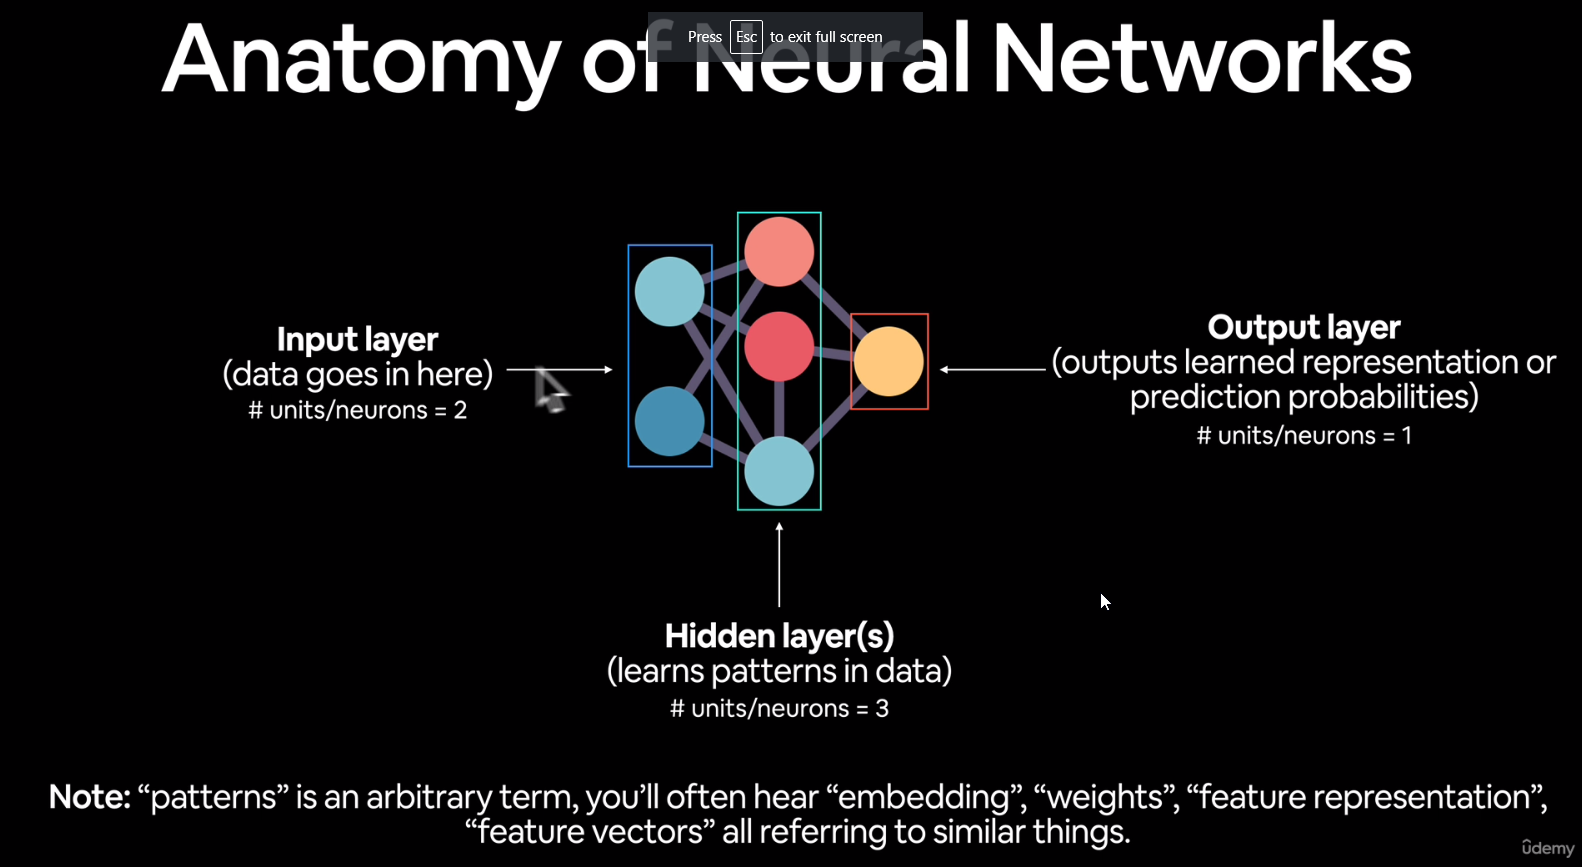

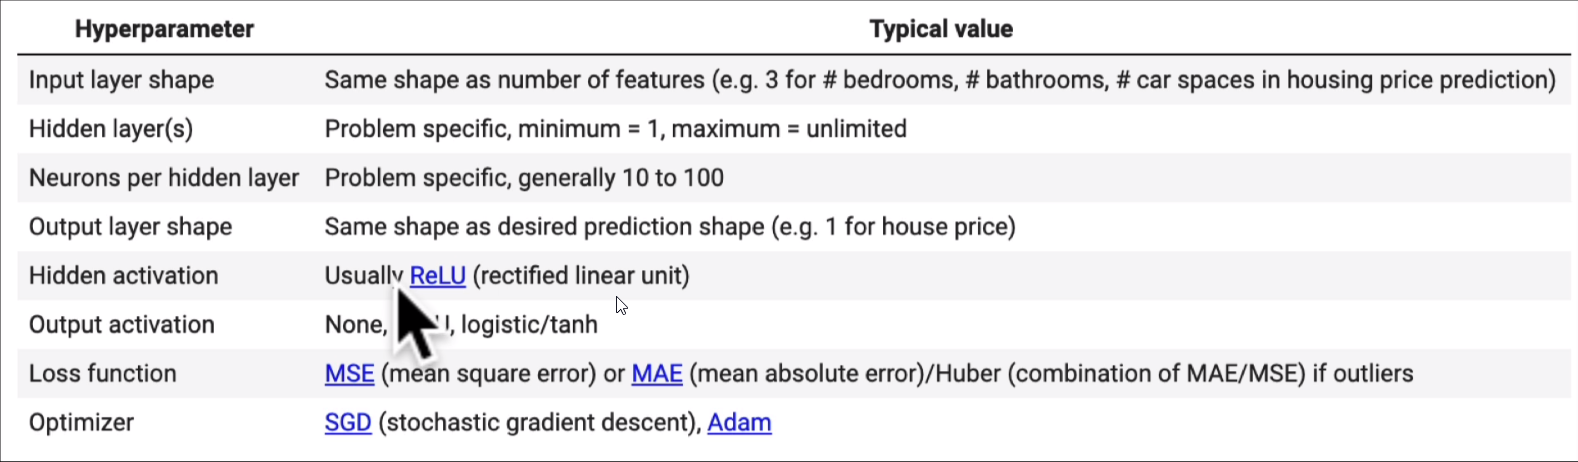

**There are many definitions for a regression problems**
The most basic one here is **prediction a numerical variable based on some other combination of variables, even shorter... prediction a number.**


In [ ]:
# importing TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit

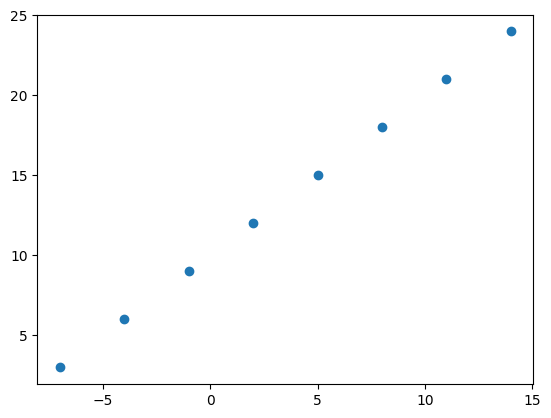

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating lables
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulalizing it
plt.scatter(X, y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Creating a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garrage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garrage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

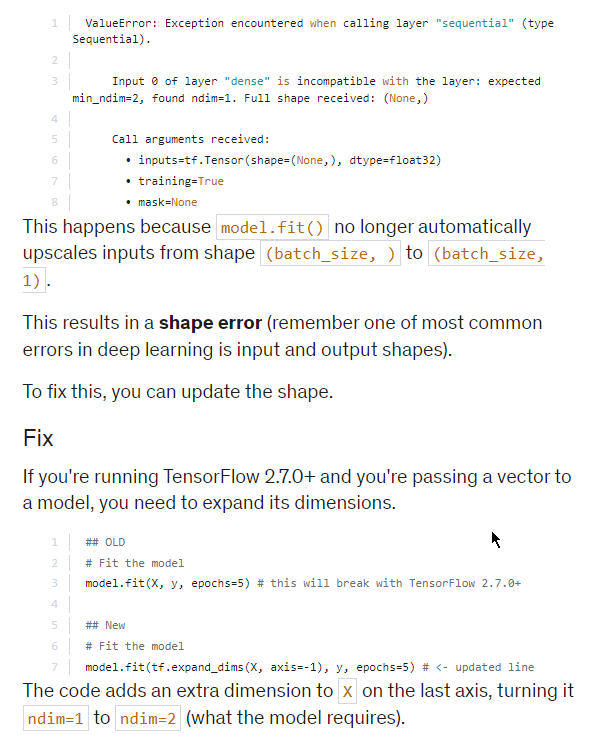

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shpae = y[0].shape

In [ ]:
input_shape, output_shape

(TensorShape([]), ())

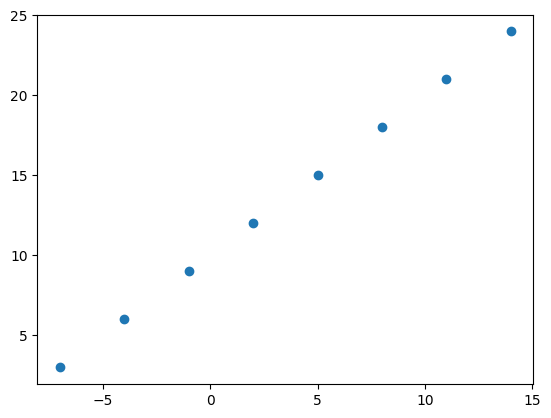

In [ ]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow
1. Creating a model - define the input and output  layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and y (features and labels).

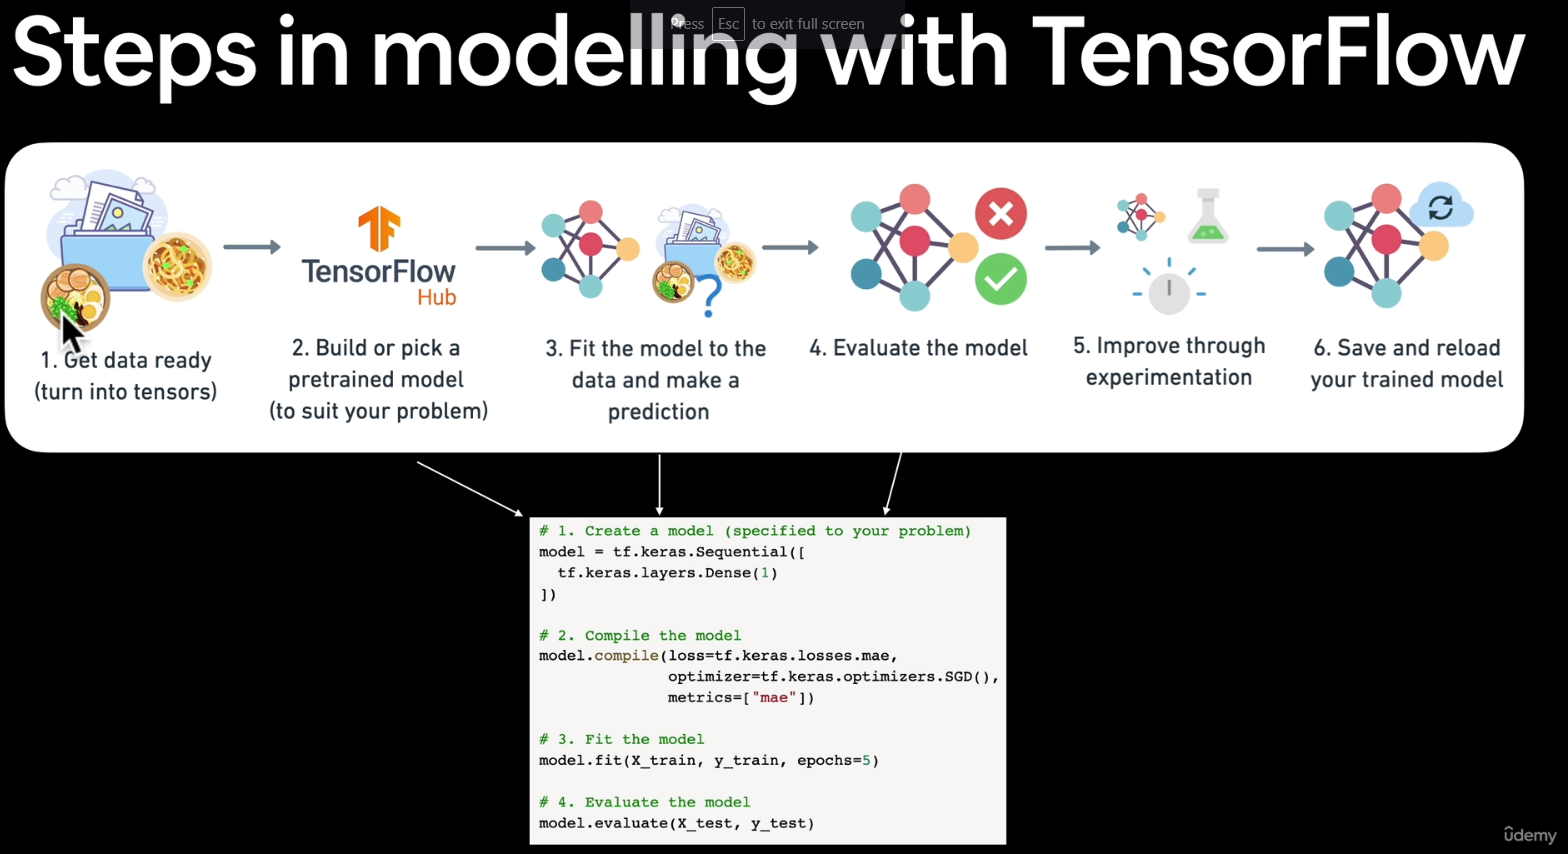

In [ ]:
for i in range (10):

In [ ]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) # Creation of the model and sequentially go through the following

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# mae = mean absolute error (i.e mean of the absolute value of the error of the values found by the model (mean(abs(predicted value - actual value))))
# SGD() is the stochastic gradient decent (optimizer that tells the model how to improve)
# model = human interpretable value for how well your model is doing
# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 371ms/step - loss: 13.4585 - mae: 13.4585
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 13.3260 - mae: 13.3260
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 13.1935 - mae: 13.1935
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 13.0610 - mae: 13.0610
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 12.9285 - mae: 12.9285


In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1)))

In [ ]:
y_pred = model.predict([17.0])

In [ ]:
y_pred

# Improving the model
We can impove our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden unites(also called neurons) within each of the hidden layeres, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples ot learn from).

In [ ]:
# 1. Createing amodel
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation = "relu"),
    # tf.keras.layers.Dense(100, activation = "relu"),
    # tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              # optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

1/1 [==============================] - 0s 11ms/step - loss: 6.8831 - mae: 6.8831
Epoch 92/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8775 - mae: 6.8775
Epoch 93/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8719 - mae: 6.8719
Epoch 94/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8663 - mae: 6.8663
Epoch 95/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8606 - mae: 6.8606
Epoch 96/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8550 - mae: 6.8550
Epoch 97/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8494 - mae: 6.8494
Epoch 98/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8438 - mae: 6.8438
Epoch 99/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8381 - mae: 6.8381
Epoch 100/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8325 - mae: 6.8325


In [ ]:
# Remind ourseleves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 55ms/step


array([[29.319353]], dtype=float32)

In [ ]:
# 1. Crete the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 843ms/step - loss: 13.8088 - mae: 13.8088
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8440 - mae: 12.8440
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8733 - mae: 11.8733
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8903 - mae: 10.8903
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.8897 - mae: 9.8897
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.8660 - mae: 8.8660
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.8134 - mae: 7.8134
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7296 - mae: 6.7296
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8247 - mae: 6.8247
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.1828 - mae: 7.1828
Epoch 11/100
1/1 [==============================] - 0s 12ms/

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# let's try to make predictions
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[26.654127]], dtype=float32)

### Common ways to improve a model
* Adding layers
* Increase the number of hidden units
* Change the activation function
* Change the optimization function
* Change the learning rate(**The most important parameter in the neural networks**)
* Fitting on more data
* Fitting for longer

because we can alter each of these they are called hyperparameters.


## Evaluating a model
 Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->
 tweak a model -> fit it -> evaluate it ...

When it comes to evaluation ... we should "visualize", "visualize", "visualize"

We should visulaize:-
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the prediction line up with the ground truths.

In [ ]:
#Making a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
y = X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

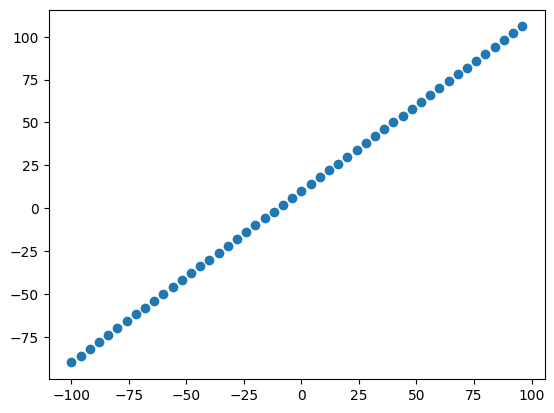

In [ ]:
# Visualizing th edata
import matplotlib.pyplot as plt

plt.scatter(X, y)

# The 3 sets ...
* Training set = This is the data from which the model learn from [70 - 80%] of the total data you have available.
* Validation set - This is the data set from which the model gets tuned on [10-15%] of the total data you have.
* Test set = This is the dataset form which the model gets evaluated from [10-15%] of the total data you have.

In [ ]:
# Checking the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
# X_train = X[:40]
# y_train = y[:40]
# X_test = X[:10]
# y_test = y[:10]
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

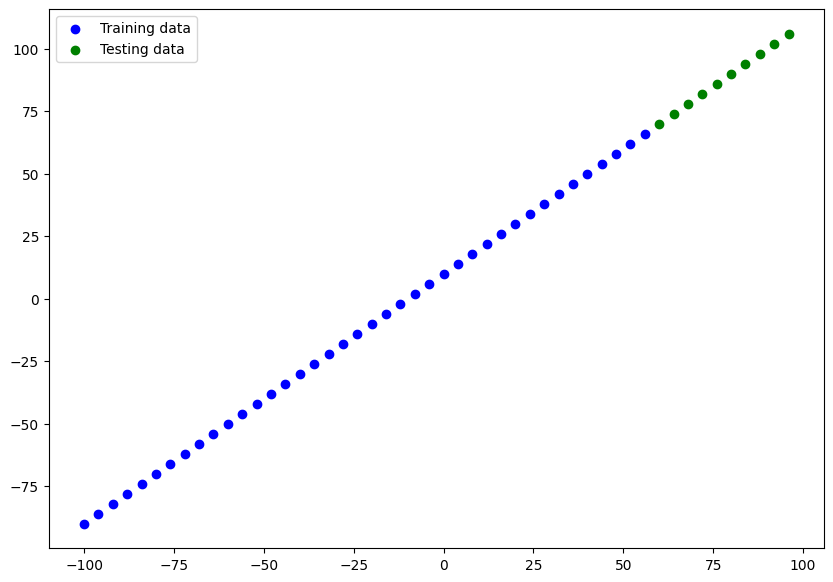

In [ ]:
plt.figure(figsize=(10, 7))
# ploting training data in blue
plt.scatter(X_train, y_train, c='b', label = "Training data")
plt.scatter(X_test, y_test, c='g', label = "Testing data")
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. build a model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# 3. fit the model
# model.fit(tf.expand_dims(X_test, axis=-1), y_test, epochs=100)

In [ ]:
# Visualizing the model
# model.summary()

In [ ]:
X[0].shape

()

In [ ]:
# Let's build a model that builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name ="output_layer")
], name = "a_model")
# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "a_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters(patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn pattern or parameters form other model during **transfer learning**).

In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [ ]:
# summary of the model
model.summary()

Model: "a_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


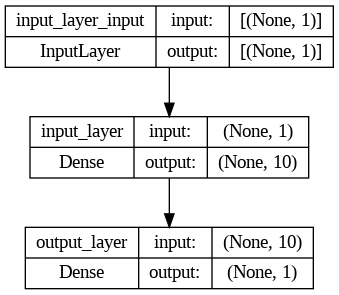

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes = True)

In [ ]:
# Visualizing the model's predictions
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 44ms/step


In [ ]:
y_pred

array([[34.845272],
       [37.07249 ],
       [39.299713],
       [41.526928],
       [43.754147],
       [45.981365],
       [48.208584],
       [50.435802],
       [52.66302 ],
       [54.890236]], dtype=float32)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
def plot_predictions(train_data= X_train,train_labels= y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c= "b", label="Training data")
    plt.scatter(test_data, test_labels, c='g', label="Testing data")
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    plt.legend();
    plt.show();

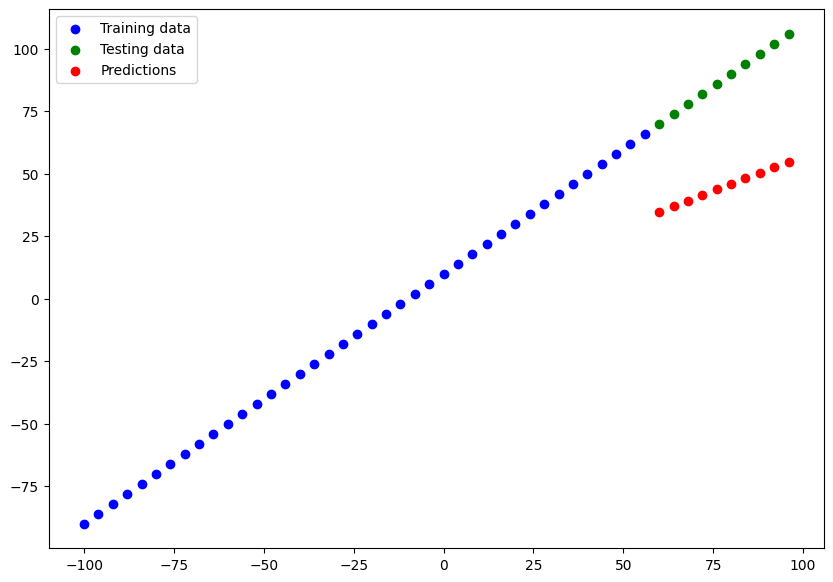

In [ ]:
plot_predictions()

## Evaluating our model's prediction with regression evaluation metrics

There are tow main metrics:
* MAE-mean absolute error
* MSE-mean square error

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 102ms/step - loss: 43.1322 - mae: 43.1322


[43.132240295410156, 43.132240295410156]

In [ ]:
# Calcualating the mean absolute error
print(tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred)))
# Calculating the mean squared error
print(tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.constant(y_pred)))


tf.Tensor(
[53.154724 50.92751  48.700287 46.473072 44.245853 42.018635 39.791416
 37.564198 35.33698  33.109764], shape=(10,), dtype=float32)
tf.Tensor(
[2957.4253 2725.611  2503.7178 2291.746  2089.6958 1897.5657 1715.3568
 1543.069  1380.7021 1228.2565], shape=(10,), dtype=float32)


In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[34.845272],
       [37.07249 ],
       [39.299713],
       [41.526928],
       [43.754147],
       [45.981365],
       [48.208584],
       [50.435802],
       [52.66302 ],
       [54.890236]], dtype=float32)>

In [ ]:
y_pred.shape

(10, 1)

In [ ]:
y_test.shape

(10,)

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.845272, 37.07249 , 39.299713, 41.526928, 43.754147, 45.981365,
       48.208584, 50.435802, 52.66302 , 54.890236], dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.13224>

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 43.1322 - mae: 43.1322


[43.132240295410156, 43.132240295410156]

In [ ]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1886.3181>

In [ ]:
# Making some functions to reuse the mae and the mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationhsips between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Doing 3 modelling experiments:
1. model_1 - same as the originalmodel, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model with 1 layer
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 18.0106 - mae: 18.0106
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 13.1466 - mae: 13.1466
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8083 - mae: 11.8083
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2690 - mae: 9.2690
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1328 - mae: 10.1328
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3999 - mae: 9.3999
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5451 - mae: 8.5451
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0434 - mae: 9.0434
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.6859 - mae: 18.6859
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0786 - mae: 10.0786
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - 

1/1 [==============================] - 0s 53ms/step


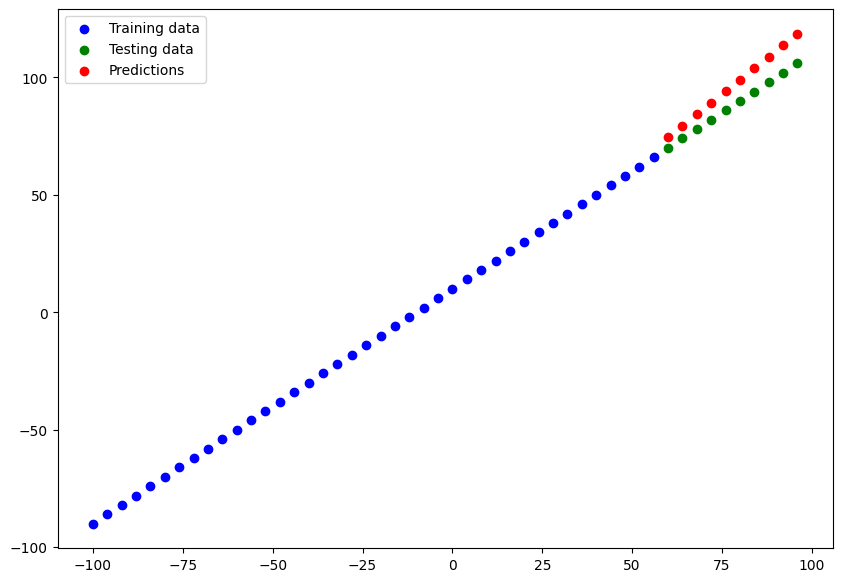

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.581153>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.118805>)

In [ ]:
y_preds_1.shape, y_test.shape

((10, 1), (10,))

In [ ]:
# Creating the model with two dense layers and trained for 100 epochs
tf.random.set_seed(42)

# 1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. Fit the model in the training data
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 37.5201 - mae: 37.5201
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 29.8764 - mae: 29.8764
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 28.1030 - mae: 28.1030
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 16.1522 - mae: 16.1522
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7531 - mae: 18.7531
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 14.1477 - mae: 14.1477
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4572 - mae: 11.4572
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2160 - mae: 11.2160
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.8380 - mae: 41.8380
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 29.0569 - mae: 29.0569
Epoch 11/100
2/2 [==============================] - 0s 9

1/1 [==============================] - 0s 44ms/step


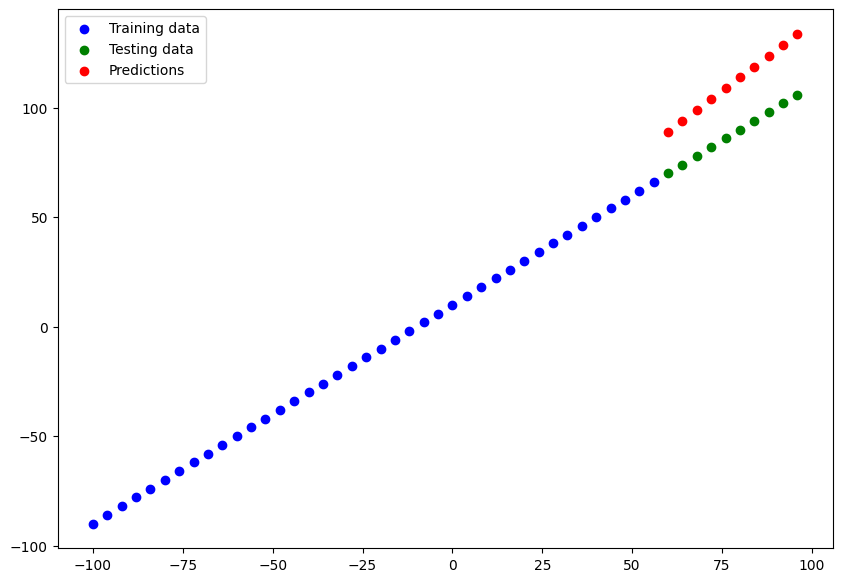

In [ ]:
y_preds_2 = model_2.predict(y_test)
plot_predictions(predictions= y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=23.330582>,
 <tf.Tensor: shape=(), dtype=float32, numpy=552.2578>)

In [ ]:
# model 3 = with 2 dense layers and 500 epochs
# set the random seed
tf.random.set_seed(42)

# 1. Create the model 3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fittign the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 41.0941 - mae: 41.0941
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 23.5601 - mae: 23.5601
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 28.6311 - mae: 28.6311
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 16.4580 - mae: 16.4580
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 19.1150 - mae: 19.1150
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 13.4712 - mae: 13.4712
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.6525 - mae: 12.6525
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0713 - mae: 11.0713
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 39.9778 - mae: 39.9778
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4369 - mae: 27.4369
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 45ms/step


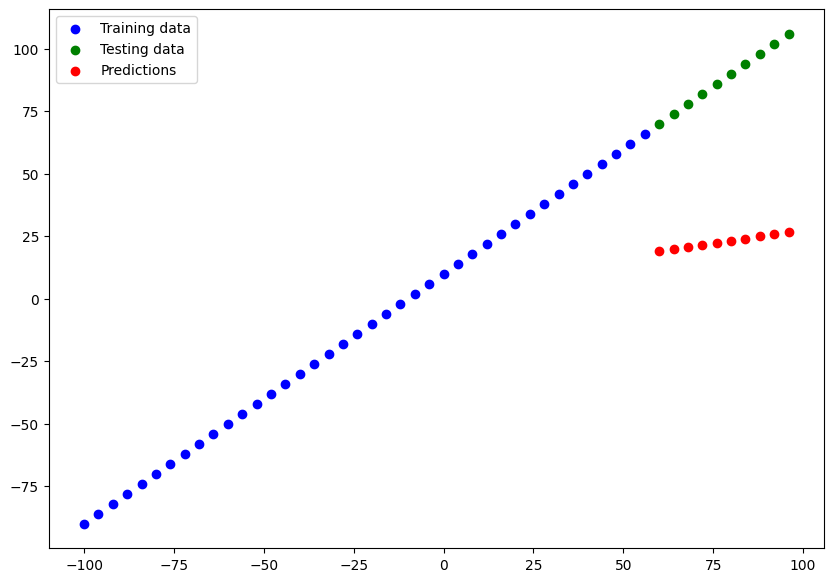

In [ ]:
y_preds_3= model_3.predict(y_test)
plot_predictions(predictions= y_preds_3)

In [ ]:
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 102ms/step - loss: 67.2422 - mae: 67.2422


[67.24220275878906, 67.24220275878906]

In [ ]:
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=65.15684>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4328.1>)

In [ ]:
print(mae(y_test, y_preds_3))
print(mse(y_test, y_preds_3))

tf.Tensor(65.15684, shape=(), dtype=float32)
tf.Tensor(4328.1, shape=(), dtype=float32)


# comparign the results of our experiments
note: start form small models and make sure they work and tehen move on to the bigger/ larger experiments/ models


In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.581153,80.118805
1,model_2,23.330582,552.257812
2,model_3,65.156837,4328.100098


In [ ]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

* track the results of your experiments.

 **Resources:**
* TensorBoard- a component of TendorFlow library to help track modelling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning experiments(plugs straight into TensorBoard).

## Saving our models

Saving the models allow us to use them outside of Google Colab (or wherever they were trained) such as in a web or a mobile application.

There are two ways in which you can save your model to

1. SavedModel format
2. HDF5 format

In [ ]:
# saving the model using the SavedModel format
model_2.save("The_first_model_save_using_savedmodel")

In [ ]:
# saving the model using HDF5 format
model_2.save("The_first_model_save_using_HDF5.h5")

In [ ]:
# loading in the saved models
loaded_saved_model_format = tf.keras.models.load_model("The_first_model_save_using_savedmodel")

In [ ]:
loaded_saved_model_format.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
saved_preds = loaded_saved_model_format.predict(X_test)
model_2_preds == saved_preds

1/1 [==============================] - 0s 46ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_preds, saved_preds

(array([[ 76.46258 ],
        [ 81.44372 ],
        [ 86.424866],
        [ 91.40601 ],
        [ 96.38715 ],
        [101.36829 ],
        [106.34944 ],
        [111.330574],
        [116.311714],
        [121.292854]], dtype=float32),
 array([[ 76.46258 ],
        [ 81.44372 ],
        [ 86.424866],
        [ 91.40601 ],
        [ 96.38715 ],
        [101.36829 ],
        [106.34944 ],
        [111.330574],
        [116.311714],
        [121.292854]], dtype=float32))

In [ ]:
# loading the h5 model
loaded_h5_model = tf.keras.models.load_model("/content/The_first_model_save_using_HDF5.h5")
loaded_h5_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Download a model( or any other file) from Google Colab

* Go to the "files" tab and right click on the desired file and downlaod it
* use from google.colab import files
files.download("/content/The_first_model_save_using_HDF5.h5")
* Save it to Google Drive by connecting Google Drive and copying it there


In [ ]:
from google.colab import files
files.download("/content/The_first_model_save_using_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8562.8086 - mae: 8562.8086
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7869.8540 - mae: 7869.8540
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7598.8696 - mae: 7598.8696
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7546.5991 - mae: 7546.5991
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7742.8750 - mae: 7742.8750
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7651.4097 - mae: 7651.4097
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7587.5742 - mae: 7587.5742
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7712.0161 - mae: 7712.0161
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7488.4790 - mae: 7488.4790
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7643.8813 - mae: 7643.8813

In [ ]:
# Check the results of the model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8569.4287 - mae: 8569.4287


[8569.4287109375, 8569.4287109375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## improving the model

In [ ]:
tf.random.set_seed(42)

# 1. Create the new model
new_insurance_model= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
new_insurance_model.compile(loss=tf.keras.losses.mean_absolute_error,
                            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                            metrics=['mae'])
# 3. Fit the mdoel
history = new_insurance_model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 11413.0469 - mae: 11413.0469
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 7462.7236 - mae: 7462.7236
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7247.5664 - mae: 7247.5664
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7010.5122 - mae: 7010.5122
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 6772.3179 - mae: 6772.3179
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6503.9263 - mae: 6503.9263
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 6381.5195 - mae: 6381.5195
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 6229.0239 - mae: 6229.0239
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 6073.9971 - mae: 6073.9971
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 5884.0073 - mae: 5884.00

In [ ]:
new_insurance_model.evaluate(X_test, y_test)
print(len(history.history['loss']))

9/9 [==============================] - 0s 3ms/step - loss: 3159.7236 - mae: 3159.7236
200


Text(0.5, 0, 'epochs')

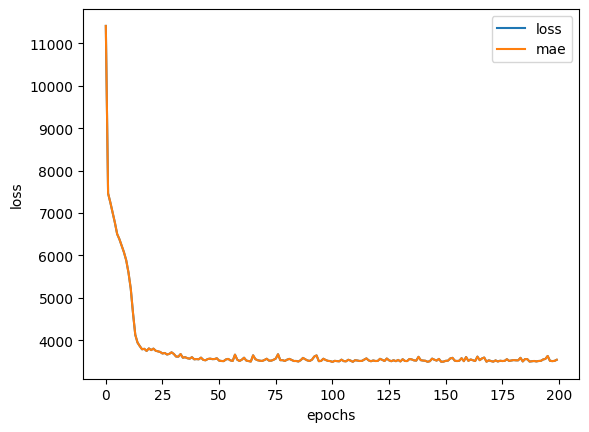

In [ ]:
# Plot history (also known as training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing the model (Feature scaling)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
# Create X & y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[76]

array([0.        , 0.38081786, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [ ]:
new_insurance_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               1200      
                                                                 
 dense_28 (Dense)            (None, 10)                1010      
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# building the model
tf.random.set_seed(42)

# 1. Create a model
model_features = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model_features.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics=["mae"])
# 3. Fit the training data in the model
model_features.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13213.1553 - mae: 13213.1553
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 11323.4277 - mae: 11323.4277
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 8103.3682 - mae: 8103.3682
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7590.5898 - mae: 7590.5898
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7099.2910 - mae: 7099.2910
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6498.9497 - mae: 6498.9497
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 5561.3164 - mae: 5561.3164
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 4409.6436 - mae: 4409.6436
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3741.8252 - mae: 3741.8252
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3676.0471 - mae: 3676.

In [ ]:
model_features.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3174.0598 - mae: 3174.0598


[3174.059814453125, 3174.059814453125]

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

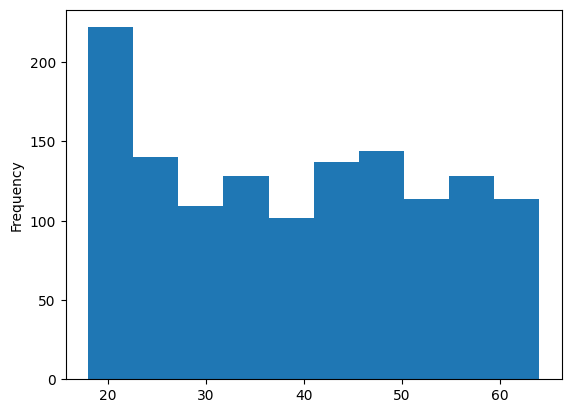

In [ ]:
X.age.plot(kind="hist")

<Axes: ylabel='Frequency'>

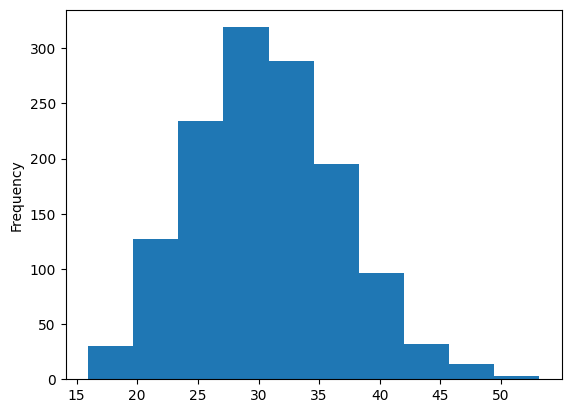

In [ ]:
X.bmi.plot(kind='hist')

In [ ]:
X.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

There are 2 types of feature scaling
* MinMaxScaler= converts all values to between 0 and 1 whilst preserving the original distribution [ Use as default scaler with neural networks. ]
* StandardScaler= Removes the mean and divides each value by the standard deviation [ Tranform a feature to have close to normal distribution { caution: this reduces the effect of outliers}]